# Load the Dependencies

In [1]:
import ipywidgets as widgets
from IPython.display import display

style = {'description_width': 'initial'}

In [2]:
#1 Importing essential libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Load the Dataset

In [3]:
#2 Importing the dataset

file_name = 'beer_data.csv'
dataset = pd.read_csv(file_name)

In [4]:
#Displaying the dataset
dataset.head(8)

,ABV,Ratings,Cellar Temperature,Score
0,7.5,1,40-45,4.08
1,5.3,22,40-45,3.82
2,9.0,1,45-50,4.03
3,4.6,1,35-40,4.00
4,6.9,1,45-50,3.75
5,7.9,32,40-45,4.26
6,4.7,141,35-40,3.47
7,5.6,1,40-45,3.70


In [5]:
print(f"Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns.")

Dataset has 1631 rows and 4 columns.


## Feature Engineering

#### Drop Nulls and Fill Nulls Based on Mean

In [6]:
#check nulls..

dataset.isnull().sum()

ABV                   0
Ratings               0
Cellar Temperature    0
Score                 0
dtype: int64

In [7]:
dataset = dataset[~dataset['Cellar Temperature'].isna()]
dataset.reset_index(inplace=True, drop=True)

In [8]:
dataset['ABV'].fillna(dataset['ABV'].mean(), inplace=True)

In [10]:
# Dealing with the categorical data

# Spliting Cellar Temperature into Maximum and Minimum based on the given data and converting the type from str to int

dataset.loc[:, 'Minimum_Cellar_Temp'] = dataset['Cellar Temperature'].apply(lambda x : int(str(x).split('-')[0].strip()))
dataset.loc[:, 'Maximum_Cellar_Temp'] = dataset['Cellar Temperature'].apply(lambda x : int(str(x).split('-')[1].strip()))

In [11]:
dataset.drop('Cellar Temperature', inplace=True, axis=1)
dataset.columns.tolist()

['ABV', 'Ratings', 'Score', 'Minimum_Cellar_Temp', 'Maximum_Cellar_Temp']

In [12]:
# classify dependent and independent variables
X = dataset[[col for col in dataset.columns if col not in ('Score')]].values  #independent variables 
y = dataset['Score'].values  #dependent variable 

In [13]:
print("\nIdependent Variables :\n\n", X[:5])
print("\nDependent Variable (Score):\n\n", y[:5])


Idependent Variables :

 [[ 7.5  1.  40.  45. ]
 [ 5.3 22.  40.  45. ]
 [ 9.   1.  45.  50. ]
 [ 4.6  1.  35.  40. ]
 [ 6.9  1.  45.  50. ]]

Dependent Variable (Score):

 [4.08 3.82 4.03 4.   3.75]


# Create Train and Test Sets

In [14]:
#4 Creating training set and testing set
from sklearn.model_selection import train_test_split
test_size = widgets.FloatSlider(min=0.01, max=0.6, value=0.2, description="Test Size :", tooltips=['Usually 20-30%'])
display(test_size)

FloatSlider(value=0.2, description='Test Size :', max=0.6, min=0.01)

In [15]:
#Divide the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=test_size.value, random_state = 0) 

In [16]:
print("Training Set :\n----------------\n")
print("X = \n", X_train[:5])
print("y = \n", y_train[:5])

print("\n\nTest Set :\n----------------\n")
print("X = \n",X_test[:5])
print("y = \n", y_test[:5])

Training Set :
----------------

X = 
 [[ 5.2  5.  40.  45. ]
 [ 5.6  1.  35.  40. ]
 [ 4.8  2.  40.  45. ]
 [ 6.5  3.  40.  45. ]
 [ 5.1  0.  40.  45. ]]
y = 
 [3.79 3.9  3.44 3.21 0.  ]


Test Set :
----------------

X = 
 [[ 4.8  2.  35.  40. ]
 [ 5.1  0.  35.  40. ]
 [ 4.   3.  40.  45. ]
 [ 7.5  3.  45.  50. ]
 [10.6  2.  45.  50. ]]
y = 
 [3.13 0.   2.82 3.91 4.38]


In [17]:
print(f"Shape of Training set is {X_train.shape}")
print(f"Shape of Testing set is {X_test.shape}")

Shape of Training set is (1304, 4)
Shape of Testing set is (327, 4)


# Apply Random Forest Regression 

In [18]:
# import random forest library
from sklearn.ensemble import RandomForestRegressor

# configure params for the model.
max_feat_wig = widgets.ToggleButtons(options=['log2', 'sqrt', 'auto'],
                                    description='Number of features for the best split :',
                                    disabled=False,
                                    style=style)

display(max_feat_wig)

max_depth_wig = widgets.Dropdown(options=[10, 20, 30, 50],
                            description='The maximum depth of the Tree. :',
                            style=style)

display(max_depth_wig)

min_split_wig = widgets.Dropdown(options=[100, 200, 300, 500],
                            description='Minimum Number of Splits. :',
                            style=style)

display(min_split_wig)

njobs_wig = widgets.Dropdown(options=[('One', 1), ('Two', 2), ('Three', 3), ('All Cores', -1)], 
                             description="Number of CPU Cores :", style=style)

display(njobs_wig)

ToggleButtons(description='Number of features for the best split :', options=('log2', 'sqrt', 'auto'), style=T…

Dropdown(description='The maximum depth of the Tree. :', options=(10, 20, 30, 50), style=DescriptionStyle(desc…

Dropdown(description='Minimum Number of Splits. :', options=(100, 200, 300, 500), style=DescriptionStyle(descr…

Dropdown(description='Number of CPU Cores :', options=(('One', 1), ('Two', 2), ('Three', 3), ('All Cores', -1)…

# Predict and Evaluate the Model 

In [19]:
# Train the Regressor with training set
regressor = RandomForestRegressor(max_features=max_feat_wig.value,
                                  max_depth=max_depth_wig.value,
                                  min_samples_split=min_split_wig.value,
                                  n_jobs=njobs_wig.value)

#fit the linear model
regressor.fit(X_train, y_train)

#7 predict the outcome of test sets
y_Pred = regressor.predict(X_test)
print("\nPredictions = ", y_Pred)


Predictions =  [3.54503887 0.         3.56879248 3.87939655 3.95756229 3.6807887
 3.66398554 0.         3.60830999 3.64127765 3.7182231  3.48398278
 3.46000722 3.51589607 3.93670961 3.80699215 3.46000722 3.86575764
 3.70212581 3.84241046 3.77206634 3.95756229 0.         4.03187902
 3.88403458 0.         3.92964719 3.60876824 3.69897015 3.88403458
 3.89699302 0.         3.74429901 0.         3.94566807 3.55481571
 3.78640349 3.90953195 3.51589607 3.53120748 3.75872353 3.58661093
 3.7182231  3.87750686 3.79211844 3.79692687 3.97857743 3.91935965
 3.62775912 3.95756229 3.94481764 3.64127765 3.79692687 3.69058669
 3.733069   3.75872353 0.         3.84241046 3.82429559 3.48398278
 3.88468407 3.91015059 3.90953195 0.         3.52619573 3.79818303
 3.91935965 3.73768766 3.50409833 3.99419397 3.80918622 3.66958109
 3.53120748 3.88853367 3.6807887  3.84825406 3.63608717 3.52347148
 3.84870167 3.75872353 3.62658668 3.86575764 3.92842076 3.95042582
 3.8141228  3.43614597 3.79211844 0.         3.

/Users/ritu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
# Calculating score from Root Mean Log Squared Error
def rmlse(y_test, y_pred):
    error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    score = 1 - error
    return score

# Printing the score
print("\n----------------------------\nRMLSE Score = ", rmlse(y_test, y_Pred))

#9 Comparing Actual and Predicted Salaries for he test set
print("\nActual vs Predicted Scores \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_Pred,
                         "Abs. Error" : np.abs(y_test - y_Pred)})

error_df


----------------------------
RMLSE Score =  0.9568831399098394

Actual vs Predicted Scores 
------------------------------



,Actual,Predicted,Abs. Error
0,3.13,3.545039,0.415039
1,0.00,0.000000,0.000000
2,2.82,3.568792,0.748792
3,3.91,3.879397,0.030603
4,4.38,3.957562,0.422438
5,4.25,3.680789,0.569211
6,3.82,3.663986,0.156014
7,0.00,0.000000,0.000000
8,3.49,3.608310,0.118310
9,2.00,3.641278,1.641278


# Feature Importance

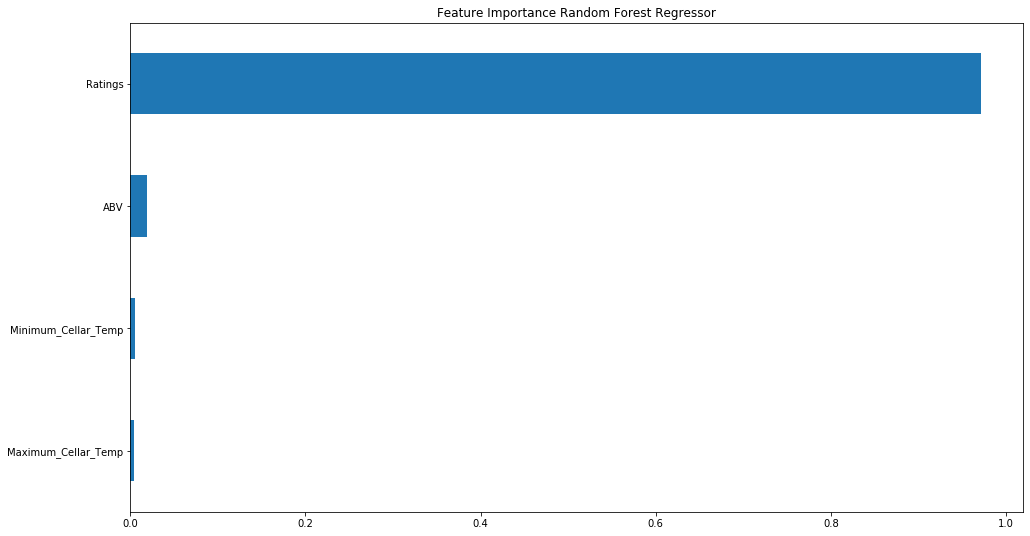

In [21]:
feat_names = [col for col in dataset.columns if col not in ('Score')]

pd.Series(regressor.feature_importances_, \
          index=feat_names).sort_values(ascending=True).plot(kind='barh', figsize=(16,9));

plt.title('Feature Importance Random Forest Regressor');

# Actual vs. Predicted 

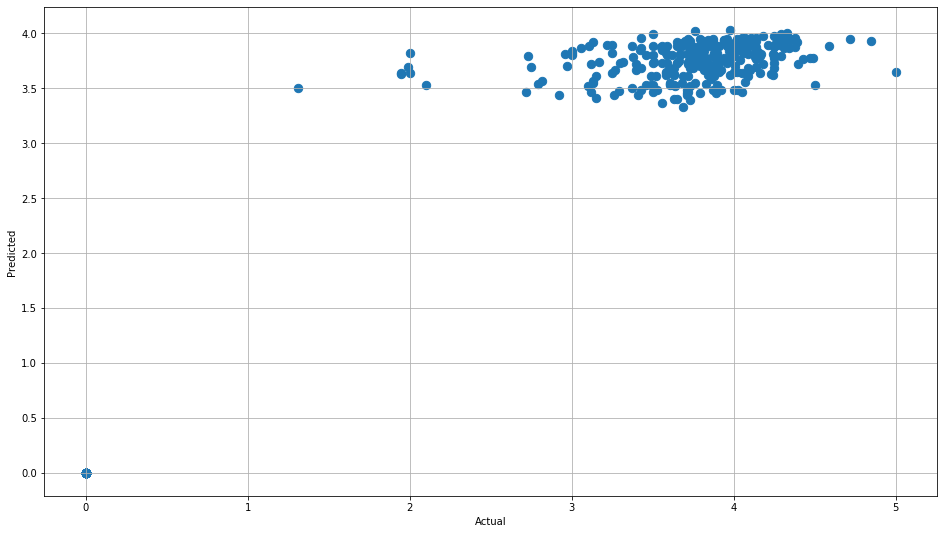

In [22]:
#Plotting Actual observation vs Predictions
plt.figure(figsize=(16, 9));
plt.scatter(y_test, y_Pred, s = 70)
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.grid();
plt.show();